In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [3]:
embeddings = np.load('/home/eamonn/Projects/music-mining/gensim/embeddings_lite.np.npy')
metadata = json.load(open('/home/eamonn/Projects/music-mining/gensim/metadata_lite.json'))

In [4]:
iddict = {}
stdict = {}
sttoid = {}

for i, l in enumerate(metadata[1:]):
    new_l = [l[0].replace("\"", "")] + l[1:]
    iddict[i] = new_l
    stdict[new_l[0]] = new_l
    sttoid[new_l[0]] = i

In [5]:
timecanonical = json.load(open('./sym40pairs.json'))

In [66]:
len(timecanonical)

2693

In [85]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
pca = PCA()
red = pca.fit_transform(embeddings)

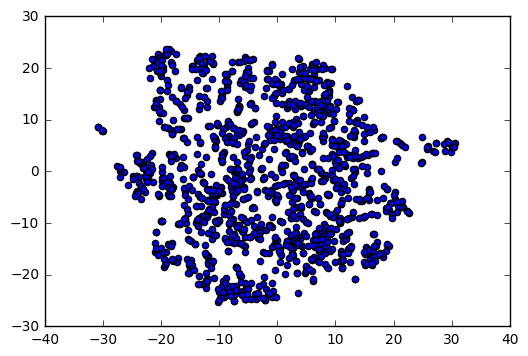

In [107]:
plt.scatter(red[:,0], red[:,1])
plt.show()

In [89]:
red.shape

(1426, 2)

In [72]:
!rm ./animframes/*.png

CPU times: user 30min 38s, sys: 8min 11s, total: 38min 49s
Wall time: 29min 23s


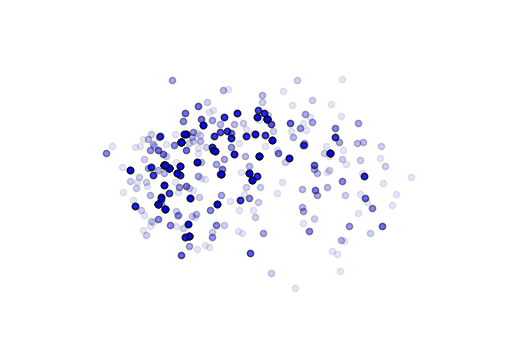

In [73]:
%%time
index = 0 
for timestamp, curst in timecanonical:
    try:
        curid = sttoid[curst]
    except KeyError:
        continue
    
    plt.scatter(red[curid,0], red[curid,1], alpha=0.9)
    plt.axis('off')
    plt.savefig('./animframes/{}.png'.format(index))
    plt.close()
    index += 1

In [74]:
tss = [pair[0] for pair in timecanonical]

In [75]:
len(tss)

2693

In [76]:
index

2691

In [77]:
durs = np.diff(tss)
fns = ['animframes/{}.png'.format(i) for i in range(len(durs) - 1)]

In [78]:
with open('demux.txt', 'w') as f:
    f.write('ffconcat version 1.0\n')
    for fn, dur in zip(fns, durs):
        f.write('file {}\n'.format(fn))
        f.write('duration {:.8}\n'.format(dur))

In [79]:
!tail demux.txt

file animframes/2686.png
duration 0.14218
file animframes/2687.png
duration 0.14218
file animframes/2688.png
duration 0.14218
file animframes/2689.png
duration 1.13744
file animframes/2690.png
duration 0.631578


In [84]:
!yes | ffmpeg -i demux.txt -i sym40-1.wav -c:a copy -vf fps=25 out.avi

ffmpeg version 3.2.2 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 6.2.1 (GCC) 20160830
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-netcdf --enable-shared --enable-version3 --enable-x11grab
  libavutil      55. 34.100 / 55. 34.100
  libavcodec     57. 64.101 / 57. 64.101
  libavformat    57. 56.100 / 57. 56.100
  libav